In [61]:
from pathlib import Path
path_to_data_notebook = Path.cwd().parent.parent.parent / "Data" / "1_Preprocesed_data.ipynb"
%run {path_to_data_notebook}

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime 
import time
from sklearn.model_selection import train_test_split

In [62]:
size = 35
x_range_to_cut = 0.001
df = get_whole_preprocessed_dataframe(size, x_range_to_cut)
# choosen property for y:
choosen_property_1 = "Total_surface_area[m2/g]"

df_with_data = df[df[choosen_property_1].notna()]    # get data if property are present
df_without_data = df[df[choosen_property_1].isna()]    # get data if property arent present

X = df_with_data['processed_flatten_isotherm_X_Y'] # x = 'processed_flatten_isotherm_X_Y'
y = df_with_data # y - temporary all columns for prediction inspection, in next steps we extract only choosen property

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y, test_size=0.02, random_state=42) #random_state=42

X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train_nested[choosen_property_1].to_numpy()
y_test = y_test_nested[choosen_property_1].to_numpy() 


scaler = StandardScaler() # only for x data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

print(f'X_train size = {len(X_train)}')
print(f'y_train size = {len(X_train)}')
print(f'X_test size = {len(X_test)}')
print(f'y_test size = {len(X_test)}')

/home/pc/moje/python_projects/adsorbents_isotherms/Data/all_data.csv
------------------------------- Preprocessing_data start -------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    1011 non-null   object 
 1   Figure_number                   1011 non-null   object 
 2   Sample_name                     1011 non-null   object 
 3   Total_surface_area[m2/g]        928 non-null    float64
 4   Total_pore_volume[cm3/g]        778 non-null    float64
 5   Micropore_volume[cm3/g]         730 non-null    float64
 6   Mesopore_volume[cm3/g]          21 non-null     float64
 7   Average_pore_diameter[nm]       121 non-null    float64
 8   Impregnation_ratio[agent/char]  20 non-null     float64
 9   Activation_type                 33 non-null     object 
 10

In [63]:
X_without = df_without_data['processed_flatten_isotherm_X_Y'].tolist()
X_without = scaler.transform(X_without) 
y_without = df_without_data[choosen_property_1].to_numpy()
print(f'X_without size = {len(X_without)}')
print(f'y_without size = {len(y_without)}')

X_without size = 82
y_without size = 82


In [64]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


In [65]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [66]:
def calculate_time(transcription_time):
    timedelta_obj = datetime.timedelta(seconds=int(transcription_time))
    return str(timedelta_obj)

In [67]:
epochs_number = 500

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(1600, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)                      
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mse', metrics=metrics)



# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
start = time.time()
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=32, validation_split=0.1, verbose=2)
end = time.time()
transcription_time = calculate_time(round((end - start),2))
print(f"Model training time: "+transcription_time)
model.summary()
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")




Epoch 1/500
25/25 - 2s - 81ms/step - loss: 1530403.3750 - mae: 1037.7700 - mse: 1530403.3750 - val_loss: 1388622.1250 - val_mae: 989.9832 - val_mse: 1388622.1250
Epoch 2/500
25/25 - 0s - 4ms/step - loss: 858493.2500 - mae: 745.3340 - mse: 858493.2500 - val_loss: 292984.9062 - val_mae: 444.7241 - val_mse: 292984.9062
Epoch 3/500
25/25 - 0s - 4ms/step - loss: 210105.6875 - mae: 368.1963 - mse: 210105.6875 - val_loss: 226449.5000 - val_mae: 370.1793 - val_mse: 226449.5000
Epoch 4/500
25/25 - 0s - 4ms/step - loss: 170880.9219 - mae: 334.4462 - mse: 170880.9219 - val_loss: 210506.8906 - val_mae: 326.7747 - val_mse: 210506.8906
Epoch 5/500
25/25 - 0s - 4ms/step - loss: 150447.9531 - mae: 309.5422 - mse: 150447.9531 - val_loss: 186409.7969 - val_mae: 310.0283 - val_mse: 186409.7969
Epoch 6/500
25/25 - 0s - 4ms/step - loss: 138747.7656 - mae: 295.4978 - mse: 138747.7656 - val_loss: 161641.1406 - val_mae: 312.2281 - val_mse: 161641.1406
Epoch 7/500
25/25 - 0s - 4ms/step - loss: 126075.5000 - ma

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1600)           │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │        80,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,560 (1.60 MB)

 Trainable params: 140,186 (547.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 280,374 (1.07 MB)

Metrics: [8332.34375, 76.56328582763672, 8332.34375]
mae = 76.56328582763672
mse = 8332.34375


Model training time without gpu, epoch = 1000 : 0:01:10

Metrics: [8332.34375, 76.56328582763672, 8332.34375]
mae = 76.56328582763672
mse = 8332.34375


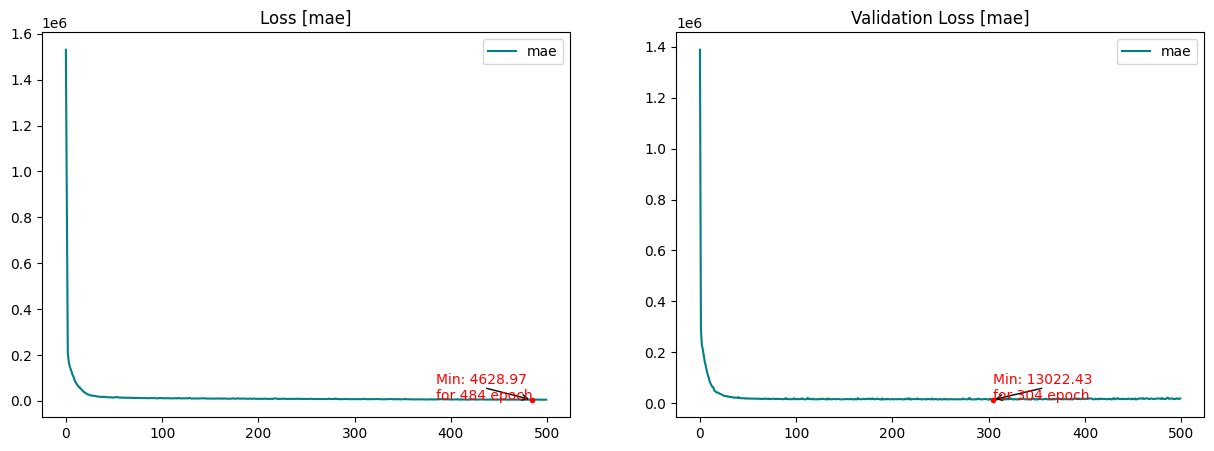

In [68]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

min_loss_idx = history.history['loss'].index(min(history.history['loss']))
min_loss = min(history.history['loss'])# Get the lowest  value
ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()
ax[0].annotate(f'Min: {min_loss:.2f} \nfor {min_loss_idx} epoch', 
               xy=(min_loss_idx, min_loss), 
               xytext=(min_loss_idx - 100, min_loss + 100),  # Adjust text position
               arrowprops=dict(facecolor='red', arrowstyle="->"),
               color='red')
ax[0].plot(min_loss_idx, min_loss, 'ro',markersize=3)# Plot a dot at the minimum point


min_val_loss_idx = history.history['val_loss'].index(min(history.history['val_loss']))# Find the index of the minimum 
min_val_loss = min(history.history['val_loss'])# Get the lowest  value
ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()
# Annotate the lowest point on the validation loss curve
ax[1].annotate(f'Min: {min_val_loss:.2f} \nfor {min_val_loss_idx} epoch', 
               xy=(min_val_loss_idx, min_val_loss), 
               xytext=(min_val_loss_idx, min_val_loss),  # Adjust text position
               arrowprops=dict(facecolor='red', arrowstyle="->"),
               color='red')
ax[1].plot(min_val_loss_idx, min_val_loss, 'ro', markersize=3)# Plot a dot at the minimum point

# ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# # ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
# ax[2].title.set_text('Validation mse')
# ax[2].legend()

plt.show()

# fig.savefig('zwykle.jpg', dpi=100)

# Test data:

In [69]:
predictions_test = model.predict(X_test, verbose=0)
y_test_for_compare = y_test
y_dataframe = y_test_nested

In [70]:
error_threshold = 30
max_error_threshold = 30

list_below =[]
list_above=[]
errors = []
for i in range(len(predictions_test)):
    data_name = y_dataframe.iloc[i,0]
    graph_number = y_dataframe.iloc[i,1]
    sample_name = y_dataframe.iloc[i,2]
    error = abs(predictions_test[i] - y_test_for_compare[i])
    
    errors.append(error)
    if(error_threshold<=error):
        list_above.append(i)
    else: list_below.append(i)

    print(f" przewidywana --> {predictions_test[i]}     {y_test_for_compare[i]} <-- rzeczyswista     blad: {error}   {data_name} {graph_number} {sample_name}")

max_error_index = errors.index(max(errors))
max_error_data_name = y_dataframe.iloc[max_error_index,0]
max_error_graph_number = y_dataframe.iloc[max_error_index,1]
max_error_sample_name = y_dataframe.iloc[max_error_index,2]
text_to_display = f"Max error: {max(errors)}  dla {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "  + "\n" + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}"
print(text_to_display)


 przewidywana --> [1448.0797]     1540.0 <-- rzeczyswista     blad: [91.92028809]   Data132 3 C-600
 przewidywana --> [960.3952]     987.0 <-- rzeczyswista     blad: [26.60479736]   Data75 4_3 1-25h
 przewidywana --> [814.3819]     652.6 <-- rzeczyswista     blad: [161.78189697]   Data91 3_1 AC-KG
 przewidywana --> [1086.9213]     1218.62 <-- rzeczyswista     blad: [131.69873535]   Data134 1 AC_15-400-1
 przewidywana --> [565.1519]     659.0 <-- rzeczyswista     blad: [93.8480835]   Data7 3 RK-600
 przewidywana --> [36.152157]     24.5399 <-- rzeczyswista     blad: [11.61225683]   Data53 1_6 ZCac
 przewidywana --> [1026.6215]     947.6 <-- rzeczyswista     blad: [79.02145996]   Data54 3 CZ0.40
 przewidywana --> [594.508]     640.0 <-- rzeczyswista     blad: [45.49200439]   Data60 1 500
 przewidywana --> [1091.7489]     985.3 <-- rzeczyswista     blad: [106.44890137]   Data43 6 F1-8-61
 przewidywana --> [1768.118]     1784.0 <-- rzeczyswista     blad: [15.88195801]   Data27 1 KUA21701-2

# Train data

In [71]:
prediction_data = model.predict(X_train, verbose=0)
y_test_for_compare = y_train
y_dataframe = y_train_nested

In [72]:
error_threshold = 300


list_below =[]
list_above=[]
errors = []
for i in range(len(prediction_data)):
    data_name = y_dataframe.iloc[i,0]
    graph_number = y_dataframe.iloc[i,1]
    sample_name = y_dataframe.iloc[i,2]
    error = abs(prediction_data[i] - y_test_for_compare[i])
    
    errors.append(error)
    if(error_threshold<=error):
        list_above.append(i)
    else: list_below.append(i)
    if(error_threshold < error):
        print(f" przewidywana --> {prediction_data[i]}     {y_test_for_compare[i]} <-- rzeczyswista     blad: {error}   {data_name} {graph_number} {sample_name}")

max_error_index = errors.index(max(errors))
max_error_data_name = y_dataframe.iloc[max_error_index,0]
max_error_graph_number = y_dataframe.iloc[max_error_index,1]
max_error_sample_name = y_dataframe.iloc[max_error_index,2]
text_to_display = f"Max error: {max(errors)}  dla {max_error_data_name} {max_error_graph_number} {max_error_sample_name}  "  + "\n" + f"for error treshold[{error_threshold}] - {round((len(list_below)/len(prediction_data))*100,2)}%     {len(list_below)} izotermy na {len(prediction_data)} blad ponizej {error_threshold}"
print(text_to_display)


 przewidywana --> [980.3205]     631.0 <-- rzeczyswista     blad: [349.32049561]   Data77 3_1 PAC200-2
 przewidywana --> [1941.6691]     1616.22 <-- rzeczyswista     blad: [325.44906738]   Data9 4 GC-C04
 przewidywana --> [2412.7349]     2801.0 <-- rzeczyswista     blad: [388.26513672]   Data11 5_2 Korean_Ag-240min
 przewidywana --> [2453.2134]     2103.45 <-- rzeczyswista     blad: [349.76337891]   Data9 4 GC-C03
 przewidywana --> [1442.3602]     991.95 <-- rzeczyswista     blad: [450.41022949]   Data9 4 GC-C02
 przewidywana --> [494.3828]     823.0 <-- rzeczyswista     blad: [328.6171875]   Data86 2 ACZ3
 przewidywana --> [224.98311]     600.0 <-- rzeczyswista     blad: [375.01689148]   Data77 3_2 CAC200-4
 przewidywana --> [1053.1783]     1543.0 <-- rzeczyswista     blad: [489.82165527]   Data159 2_1 MPC
 przewidywana --> [82.48167]     402.0 <-- rzeczyswista     blad: [319.51833344]   Data46 6 ML_0%_bo
Max error: [489.82165527]  dla Data159 2_1 MPC  
for error treshold[300] - 98.97

In [56]:
predictions_for_data_without = model.predict(X_without, verbose=0)
for i in range(len(predictions_for_data_without)):
    print(f'{predictions_for_data_without[i][0]:.2f}    <---->  {y_without[i]:.2f}   ')

676.73    <---->  nan   
279.33    <---->  nan   
37.55    <---->  nan   
34.70    <---->  nan   
62.53    <---->  nan   
170.44    <---->  nan   
149.42    <---->  nan   
284.26    <---->  nan   
1248.10    <---->  nan   
1241.49    <---->  nan   
2022.96    <---->  nan   
666.95    <---->  nan   
1297.34    <---->  nan   
1812.63    <---->  nan   
1110.41    <---->  nan   
1699.79    <---->  nan   
1501.94    <---->  nan   
729.42    <---->  nan   
934.98    <---->  nan   
342.71    <---->  nan   
1519.86    <---->  nan   
2271.26    <---->  nan   
300.14    <---->  nan   
829.22    <---->  nan   
830.14    <---->  nan   
969.77    <---->  nan   
952.60    <---->  nan   
619.30    <---->  nan   
1021.38    <---->  nan   
1125.33    <---->  nan   
2790.16    <---->  nan   
2453.42    <---->  nan   
2323.66    <---->  nan   
1719.83    <---->  nan   
1697.98    <---->  nan   
2054.75    <---->  nan   
2671.29    <---->  nan   
2458.49    <---->  nan   
1501.96    <---->  nan   
1694.55

In [45]:
#model.save("saved_models/model_s35_500_mae3400_maxerr-121_warstwy-35-160-50.keras")


In [46]:
from tensorflow.keras.models import load_model
model_name = 'saved_models/model_s35_500_mae34_maxerr-121_warstwy-35-160-50.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)
print(f"len {len(X_test)}")
error_threshold = 30
max_error_threshold = 30
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    # if(abs(predictions[i] - y_test[i]) > max_error_threshold):
    #     print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)
print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        


print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

len 18

ALL:
 przewidywana --> [971.2737]     1041.9 <-- rzeczyswista     blad: [70.62631836]  ['Data58', '850-45m', '5_4', 'II']
 przewidywana --> [395.97638]     378.0 <-- rzeczyswista     blad: [17.97637939]  ['Data115', 'CAC1900', '1', 'I']
 przewidywana --> [742.24585]     770.1 <-- rzeczyswista     blad: [27.85415039]  ['Data58', '800-1h', '5_3', 'II']
 przewidywana --> [1362.1091]     1343.0 <-- rzeczyswista     blad: [19.10913086]  ['Data150', '10stC', '4', 'I_II']
 przewidywana --> [590.9509]     659.0 <-- rzeczyswista     blad: [68.04907227]  ['Data7', 'RK-600', '3', 'I']
 przewidywana --> [776.3707]     817.2 <-- rzeczyswista     blad: [40.82927246]  ['Data58', '800-1h15m', '5_3', 'II']
 przewidywana --> [1479.6089]     1387.0 <-- rzeczyswista     blad: [92.60888672]  ['Data65', 'R2-500', '2_2', 'I_IV']
 przewidywana --> [2005.0792]     2064.0 <-- rzeczyswista     blad: [58.92077637]  ['Data59', 'CMS500', '2', 'I_II']
 przewidywana --> [457.05875]     448.0 <-- rzeczyswista 

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173